In [1]:
import random
import pandas as pd
import time

# Simulate 100 rows of sensor data
def simulate_sensor_data():
    return {
        "voltage": round(random.uniform(210, 240), 2),
        "current": round(random.uniform(5, 15), 2),
        "temperature": round(random.uniform(25, 45), 2),
        "timestamp": pd.Timestamp.now()
    }

# Generate dataset
df = pd.DataFrame([simulate_sensor_data() for _ in range(100)])
df.head()


,voltage,current,temperature,timestamp
0,229.98,9.11,35.79,2025-06-07 13:25:28.610846
1,230.68,9.23,32.14,2025-06-07 13:25:28.611859
2,216.63,6.20,26.99,2025-06-07 13:25:28.611859
3,236.55,7.39,43.00,2025-06-07 13:25:28.611859
4,237.70,10.23,31.19,2025-06-07 13:25:28.611859


In [2]:
def detect_anomaly(row):
    return row['voltage'] > 235 or row['temperature'] > 40

df['anomaly'] = df.apply(detect_anomaly, axis=1)
# ✅ Filter and save anomaly data (optional)
alerts = df[df['anomaly']]
alerts.to_csv("anomaly_logs.csv", index=False)
print("✅ Alerts saved to anomaly_logs.csv")



✅ Alerts saved to anomaly_logs.csv


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create a load column
df['load'] = df['voltage'] * df['current']

X = df[['voltage', 'current', 'temperature']]
y = df['load']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

predicted_load = model.predict(X_test)
for i, prediction in enumerate(predicted_load[:10]):
    print(f"🔮 Predicted Load {i+1}: {round(prediction, 2)} W")





🔮 Predicted Load 1: 2786.15 W
🔮 Predicted Load 2: 2507.84 W
🔮 Predicted Load 3: 2425.84 W
🔮 Predicted Load 4: 2134.48 W
🔮 Predicted Load 5: 1480.21 W
🔮 Predicted Load 6: 3114.23 W
🔮 Predicted Load 7: 2507.13 W
🔮 Predicted Load 8: 2897.58 W
🔮 Predicted Load 9: 2432.12 W
🔮 Predicted Load 10: 3150.33 W


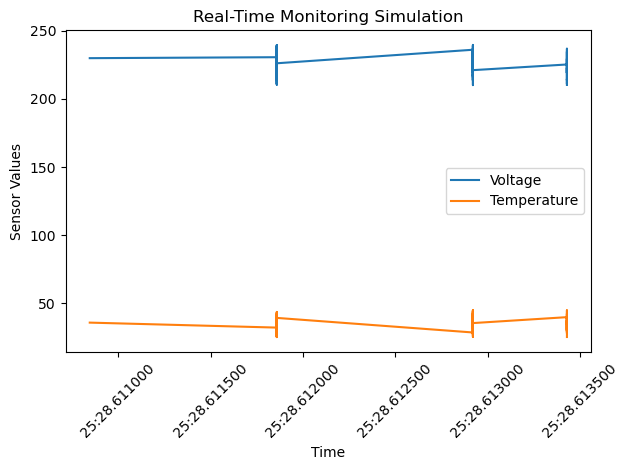

In [4]:
import matplotlib.pyplot as plt

plt.plot(df['timestamp'], df['voltage'], label='Voltage')
plt.plot(df['timestamp'], df['temperature'], label='Temperature')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.title("Real-Time Monitoring Simulation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
alerts = df[df['anomaly'] == True]

for _, row in alerts.iterrows():
    print(f"⚠️ ALERT at {row['timestamp']}: High reading detected! Voltage={row['voltage']}V Temp={row['temperature']}°C")
print(f"⚠️ Total Alerts Detected: {df['anomaly'].sum()}")


⚠️ ALERT at 2025-06-07 13:25:28.611859: High reading detected! Voltage=236.55V Temp=43.0°C
⚠️ ALERT at 2025-06-07 13:25:28.611859: High reading detected! Voltage=237.7V Temp=31.19°C
⚠️ ALERT at 2025-06-07 13:25:28.611859: High reading detected! Voltage=216.29V Temp=43.17°C
⚠️ ALERT at 2025-06-07 13:25:28.611859: High reading detected! Voltage=229.85V Temp=43.62°C
⚠️ ALERT at 2025-06-07 13:25:28.611859: High reading detected! Voltage=237.69V Temp=38.65°C
⚠️ ALERT at 2025-06-07 13:25:28.611859: High reading detected! Voltage=236.33V Temp=41.58°C
⚠️ ALERT at 2025-06-07 13:25:28.611859: High reading detected! Voltage=232.23V Temp=41.72°C
⚠️ ALERT at 2025-06-07 13:25:28.611859: High reading detected! Voltage=235.72V Temp=25.51°C
⚠️ ALERT at 2025-06-07 13:25:28.611859: High reading detected! Voltage=228.0V Temp=40.98°C
⚠️ ALERT at 2025-06-07 13:25:28.611859: High reading detected! Voltage=238.15V Temp=38.91°C
⚠️ ALERT at 2025-06-07 13:25:28.611859: High reading detected! Voltage=235.76V Temp

In [6]:
import sys
!{sys.executable} -m pip install paho-mqtt


Defaulting to user installation because normal site-packages is not writeable


In [7]:
!pip show paho-mqtt
import sys
print(sys.executable)



Name: paho-mqtt
Version: 2.1.0
Summary: MQTT version 5.0/3.1.1 client class
Home-page: http://eclipse.org/paho
Author: 
Author-email: Roger Light <roger@atchoo.org>
License: EPL-2.0 OR BSD-3-Clause
Location: C:\Users\vp380\AppData\Roaming\Python\Python312\site-packages
Requires: 
Required-by: 
C:\ProgramData\anaconda3\python.exe


In [8]:
import paho.mqtt.publish as publish
import json

for i in range(10):
    payload = {
        "voltage": round(random.uniform(220, 240), 2),
        "current": round(random.uniform(5, 15), 2),
        "temperature": round(random.uniform(30, 45), 2)
    }
    publish.single("grid/sensors", json.dumps(payload), hostname="broker.hivemq.com")
    print("📤 Sent:", payload)
    time.sleep(2)


📤 Sent: {'voltage': 220.89, 'current': 13.3, 'temperature': 38.18}
📤 Sent: {'voltage': 228.34, 'current': 12.96, 'temperature': 37.97}
📤 Sent: {'voltage': 224.06, 'current': 7.56, 'temperature': 35.06}
📤 Sent: {'voltage': 233.39, 'current': 5.39, 'temperature': 31.25}
📤 Sent: {'voltage': 233.74, 'current': 11.85, 'temperature': 38.27}
📤 Sent: {'voltage': 233.25, 'current': 13.03, 'temperature': 38.39}
📤 Sent: {'voltage': 234.13, 'current': 10.77, 'temperature': 41.72}
📤 Sent: {'voltage': 220.24, 'current': 8.62, 'temperature': 32.41}
📤 Sent: {'voltage': 233.88, 'current': 13.87, 'temperature': 43.04}
📤 Sent: {'voltage': 223.17, 'current': 12.58, 'temperature': 31.15}
